# Get the MNIST Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
mnist.train.num_examples #Returning no of images

55000

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.validation.images.shape

(5000, 784)

In [8]:
mnist.train.images[100].shape

(784,)

In [9]:
mnist.train.images[99].min()

0.0

In [10]:
mnist.train.images[99].max()

1.0

### Visualizing the Data

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

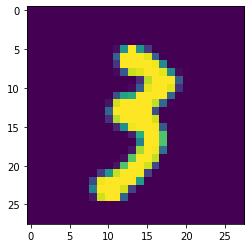

In [12]:
plt.imshow(mnist.train.images[3450].reshape(28,28))

In [13]:
batch_x , batch_y = mnist.train.next_batch(5000) #

In [14]:
batch_x.shape

(5000, 784)

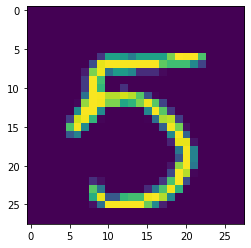

In [15]:
plt.imshow(batch_x[3450].reshape(28,28))

In [16]:
batch_y[3450]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [17]:
print(batch_y[3450].argmax())

5


## Create the Model

In [18]:
#placeholder to read and feed images at run time
x = tf.placeholder(tf.float32,shape=[None,784])

#placeholde to feed the labels at runtime
y_true = tf.placeholder(tf.float32,[None,10])

In [19]:
#Hidden Layer of 10 neurons

# 10 sets of 784 weights
W = tf.Variable(tf.zeros([784,10]))

#10 biases - one for each neuron
b = tf.Variable(tf.zeros([10]))

# Net input function
I = tf.matmul(x,W) + b 

#activation function - Softmax
Output=tf.nn.softmax(I)

Loss and Optimizer

In [20]:
#define loss function

individual_loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=Output)
loss_function = tf.reduce_mean(individual_loss)

In [21]:
#optimize the loss using gradient descent optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

train = optimizer.minimize(loss_function)

### Create Session

In [22]:
init = tf.global_variables_initializer()

In [23]:
sess=tf.Session()
sess.run(init)

In [24]:
#training
for step in range(10000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [25]:
#first pass last layer output I - throgh softmax activation
#softmxoutput = tf.nn.softmax(I)
#NOTE: There will be no iteration for test 
predict=sess.run(Output,feed_dict={x:mnist.test.images})

In [26]:
#argmax will give the predicted value in terms of a number 
result=sess.run(tf.argmax(predict,1))

#predicted values
result

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [27]:
#same way get the label value using argmax
label_number=tf.argmax(mnist.test.labels,1)
labels=sess.run(label_number)

labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
accuracy_score(result,labels)

0.9263

In [29]:
confusion_matrix(result,labels)

array([[ 961,    0,   12,    2,    2,   10,   10,    3,    3,   12],
       [   0, 1103,    1,    0,    2,    3,    3,    7,    4,    5],
       [   2,    3,  921,   24,    3,    6,    4,   28,    6,    3],
       [   2,    6,   10,  926,    1,   35,    2,    5,   18,   11],
       [   1,    1,   15,    1,  927,   14,    7,    8,    9,   28],
       [   1,    2,    5,   18,    0,  757,   11,    0,   17,   13],
       [  10,    4,   14,    3,   12,   16,  917,    0,   11,    0],
       [   1,    2,   13,    9,    2,   10,    1,  948,   14,   13],
       [   2,   14,   33,   17,    3,   32,    3,    5,  890,   11],
       [   0,    0,    8,   10,   30,    9,    0,   24,    2,  913]],
      dtype=int64)

In [30]:
#Run inference to test the model 

#test with a single image
#fetch one image
test_image,test_label=mnist.test.next_batch(1)

In [31]:
type(test_image)

numpy.ndarray

In [37]:
#run inference    

predicted_number=tf.argmax(Output,1)
print("Predicted Number:")
print(sess.run(predicted_number,feed_dict={x:test_image}))

Predicted Number:
[6]


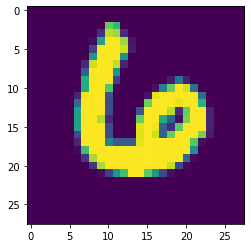

In [33]:
#display the image
plt.imshow(test_image.reshape(28,28))

In [34]:
help( mnist.train.next_batch)

Help on method next_batch in module tensorflow.contrib.learn.python.learn.datasets.mnist:

next_batch(batch_size, fake_data=False, shuffle=True) method of tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet instance
    Return the next `batch_size` examples from this data set.

